In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vegetable-image-dataset


In [94]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121, ResNet50
sns.set()

In [3]:
images, labels = [], []
for i in os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/train'):
    for j in os.listdir(os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', i)):
        path = os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [4]:
df = pd.DataFrame({
    'label' : labels
})

The size of the dataset is: 15000
The shape of each images in the dataset is: (80, 80, 3)
The number of classes in the dataset is: 15
The classes in the dataset are: ['Broccoli' 'Capsicum' 'Bottle_Gourd' 'Radish' 'Tomato' 'Brinjal'
 'Pumpkin' 'Carrot' 'Papaya' 'Cabbage' 'Bitter_Gourd' 'Cauliflower' 'Bean'
 'Cucumber' 'Potato']
The data distribution of each classes is: label
Broccoli        1000
Capsicum        1000
Bottle_Gourd    1000
Radish          1000
Tomato          1000
Brinjal         1000
Pumpkin         1000
Carrot          1000
Papaya          1000
Cabbage         1000
Bitter_Gourd    1000
Cauliflower     1000
Bean            1000
Cucumber        1000
Potato          1000
Name: count, dtype: int64


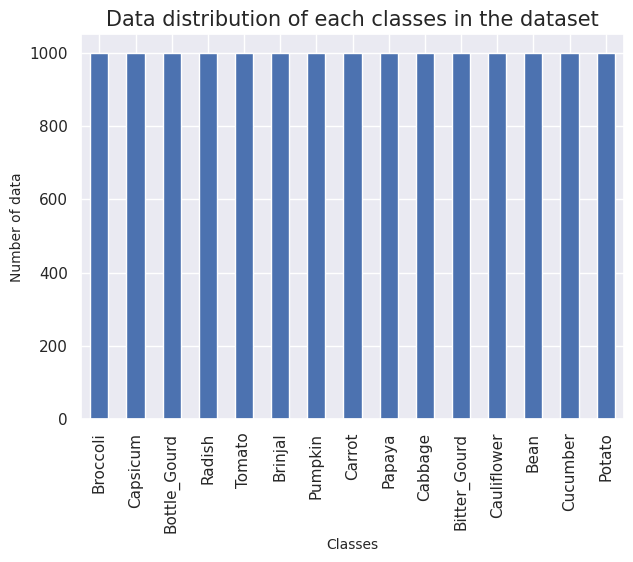

In [5]:
print('The size of the dataset is:', len(images))
print('The shape of each images in the dataset is:', images[0].shape)
print('The number of classes in the dataset is:', df['label'].nunique())
print('The classes in the dataset are:', df['label'].unique())
print('The data distribution of each classes is:', df['label'].value_counts())
df['label'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes in the dataset', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [6]:
test_images, test_labels = [], []
for i in os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/test'):
    for j in os.listdir(os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/test', i)):
        path = os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/test', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            test_images.append(resized_img)
            test_labels.append(i)
        

In [7]:
print('The size of test dataset is:', len(test_images))

The size of test dataset is: 3000


In [8]:
valid_images, valid_labels = [], []
for i in os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'):
    for j in os.listdir(os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation', i)):
        path = os.path.join('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            valid_images.append(resized_img)
            valid_labels.append(i)

In [9]:
print('The size of validation set is:', len(valid_images))

The size of validation set is: 3000


In [10]:
train_images, train_labels = shuffle(images, labels)

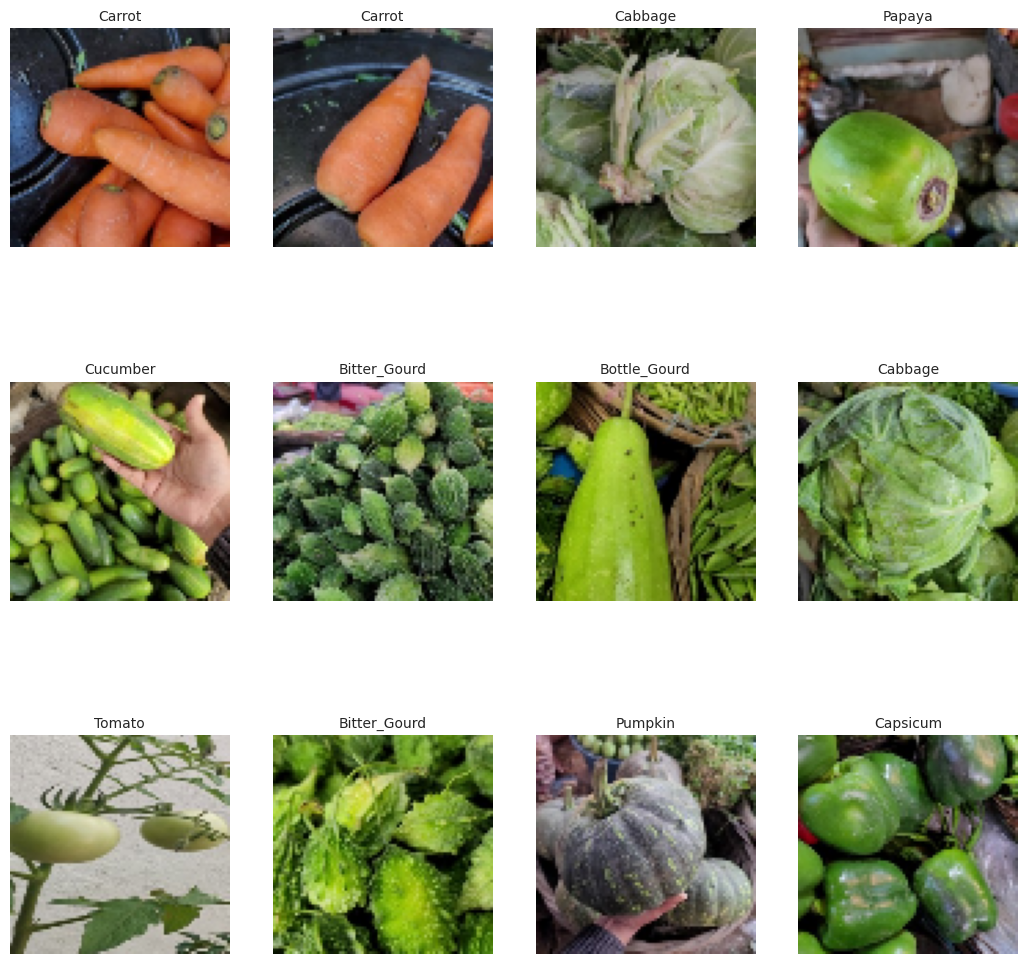

In [11]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    pi = np.array(cv2.cvtColor(train_images[i], cv2.COLOR_BGR2RGB))
    plt.imshow(pi)
    plt.title(train_labels[i], fontsize = 10)
    plt.axis('off')

In [12]:
train_images = np.array(train_images)

In [13]:
X_train = train_images / 255

In [14]:
test_images = np.array(test_images)

In [15]:
X_test = test_images / 255

In [16]:
valid_images = np.array(valid_images)

In [17]:
X_val = valid_images / 255

In [18]:
le = LabelEncoder()

In [19]:
y_train = le.fit_transform(train_labels)

In [20]:
y_test = le.fit_transform(test_labels)

In [21]:
y_val = le.fit_transform(valid_labels)

In [22]:
X_test, y_test = shuffle(X_test, y_test)

In [23]:
X_val, y_val = shuffle(X_val, y_val)

In [30]:
model = Sequential()

In [31]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'softmax'))

In [32]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

In [34]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3354 - loss: 1.9750 - val_accuracy: 0.7547 - val_loss: 0.7592
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7530 - loss: 0.7549 - val_accuracy: 0.8743 - val_loss: 0.4388
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8522 - loss: 0.4703 - val_accuracy: 0.9193 - val_loss: 0.2882
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8917 - loss: 0.3458 - val_accuracy: 0.9263 - val_loss: 0.2483
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9108 - loss: 0.2798 - val_accuracy: 0.9480 - val_loss: 0.1894
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9326 - loss: 0.2114 - val_accuracy: 0.9120 - val_loss: 0.3043
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9390 - loss: 0.1878 - val_accuracy: 0.9543 - val_loss: 0.1798
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9492 - loss: 0.1660 - val_acc

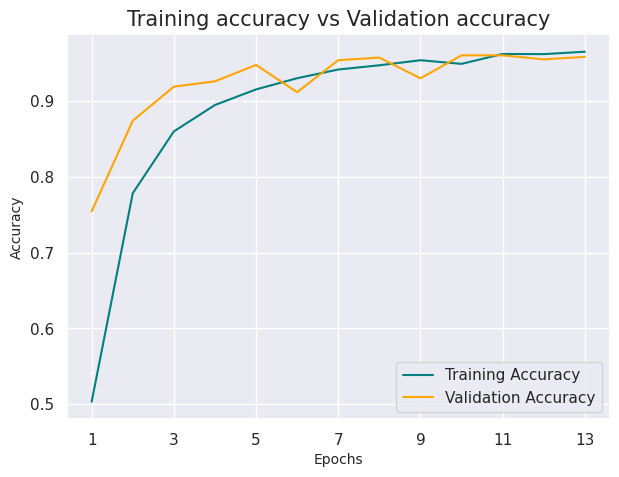

In [36]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.xticks(ticks = [0, 2, 4, 6, 8, 10, 12], labels = [1, 3, 5, 7, 9, 11, 13])
plt.legend()
plt.show()

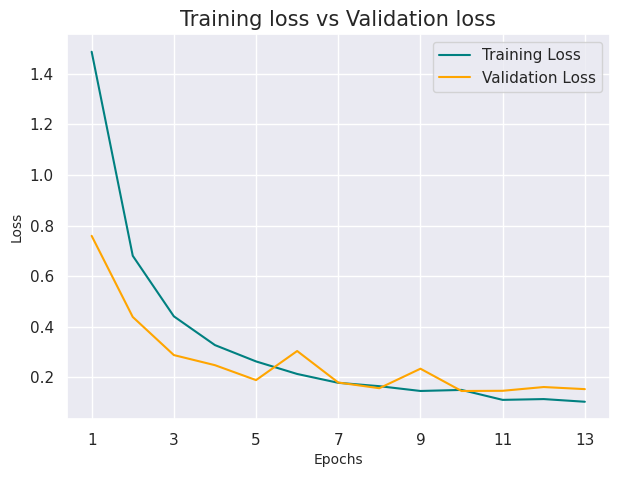

In [38]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.xticks(ticks = [0, 2, 4, 6, 8, 10, 12], labels = [1, 3, 5, 7, 9, 11, 13])
plt.legend()
plt.show()

In [39]:
model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1712


[0.16031667590141296, 0.9553333520889282]

In [40]:
y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [41]:
y_pred[:3]

array([[1.02293652e-05, 1.80411330e-08, 1.34032663e-09, 1.45430095e-08,
        1.19417684e-10, 1.78486061e-08, 5.53864177e-10, 1.27959589e-04,
        1.24562488e-04, 2.61770566e-07, 6.26282182e-09, 8.63508176e-05,
        1.88164734e-07, 9.99308467e-01, 3.41909472e-04],
       [7.42505828e-04, 1.29780886e-07, 3.15499119e-13, 2.69704469e-04,
        1.43375829e-07, 2.01302920e-14, 3.32869019e-12, 2.12668795e-19,
        5.79869930e-10, 9.98987496e-01, 2.79031660e-08, 9.30660183e-19,
        2.73597334e-14, 8.59129471e-18, 6.98679959e-12],
       [7.26926828e-07, 3.64618302e-07, 4.48953397e-05, 1.11667410e-04,
        2.94313327e-06, 4.17272896e-01, 5.97453536e-08, 3.99109190e-08,
        5.52174188e-02, 1.35620709e-07, 3.95113586e-09, 5.99714508e-03,
        5.14002144e-01, 7.22538866e-03, 1.24174752e-04]], dtype=float32)

In [43]:
y_p = [np.argmax(i) for i in y_pred]

In [45]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       200
           1       0.97      0.96      0.97       200
           2       0.97      0.99      0.98       200
           3       0.88      0.98      0.92       200
           4       0.93      0.97      0.95       200
           5       0.93      0.95      0.94       200
           6       0.99      0.96      0.98       200
           7       1.00      0.99      1.00       200
           8       0.98      0.88      0.92       200
           9       0.99      0.94      0.97       200
          10       0.98      0.97      0.98       200
          11       0.99      0.99      0.99       200
          12       0.93      0.92      0.92       200
          13       0.98      0.98      0.98       200
          14       0.94      0.86      0.90       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

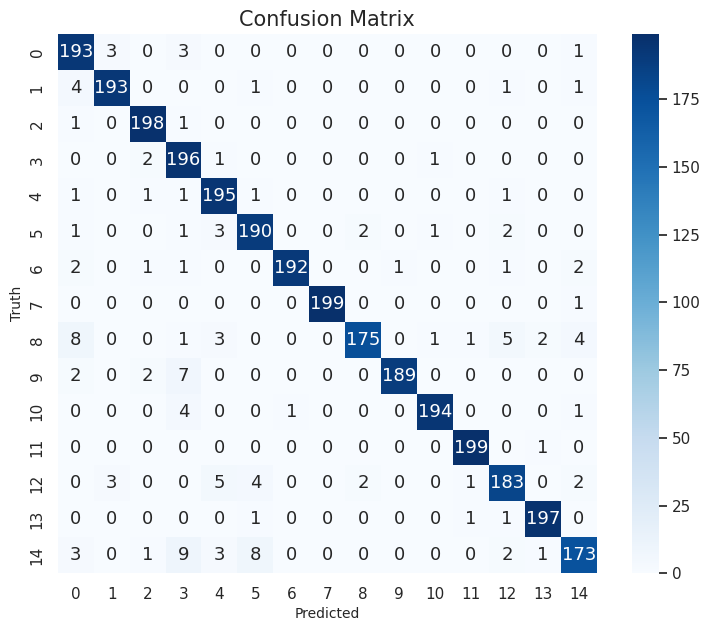

In [47]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_p), annot = True, square = True, cbar = True, annot_kws = {'size' : 13}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [49]:
base_model1 = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [63]:
densenet_model = Sequential()

In [64]:
densenet_model.add(base_model1)
densenet_model.add(Flatten())
densenet_model.add(Dense(15, activation = 'softmax'))

In [65]:
densenet_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [66]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 3)

In [67]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_delta = 0.001)

In [68]:
history2 = densenet_model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), callbacks = [reduce_lr])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 188s 190ms/step - accuracy: 0.9147 - loss: 0.3254 - val_accuracy: 0.6823 - val_loss: 6.5712 - learning_rate: 0.0010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9762 - loss: 0.0814 - val_accuracy: 0.9057 - val_loss: 0.4682 - learning_rate: 0.0010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9602 - loss: 0.2028 - val_accuracy: 0.8583 - val_loss: 0.7014 - learning_rate: 0.0010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9771 - loss: 0.0868 - val_accuracy: 0.9933 - val_loss: 0.0246 - learning_rate: 0.0010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 0.9863 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9924 - loss: 0.0260 - val_accuracy: 0.9900 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9960 -

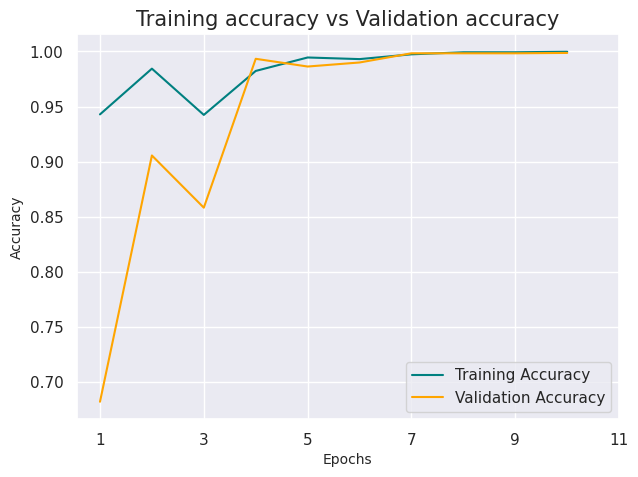

In [73]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.xticks(ticks = [0, 2, 4, 6, 8, 10], labels = [1, 3, 5, 7, 9, 11])
plt.show()

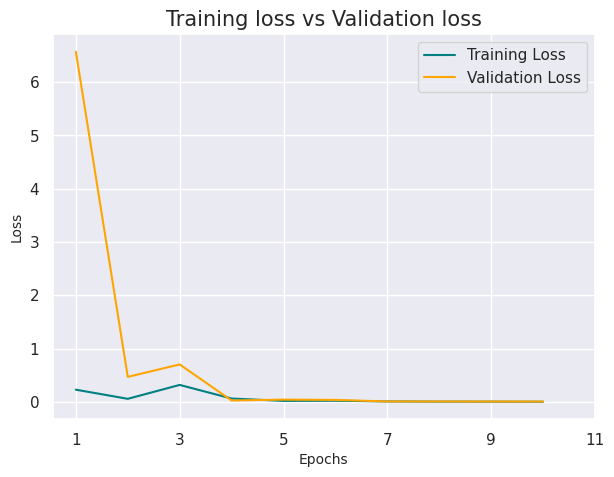

In [81]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.xticks(ticks = [0, 2, 4, 6, 8, 10], labels = [1, 3, 5, 7, 9, 11])
plt.legend()
plt.show()

In [74]:
densenet_model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9959 - loss: 0.0211


[0.012137088924646378, 0.9973333477973938]

In [75]:
y_pred2 = densenet_model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step


In [76]:
y_p2 = [np.argmax(i) for i in y_pred2]

In [77]:
print(classification_report(y_test, y_p2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      0.99      0.99       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      0.99      0.99       200
           5       0.99      1.00      1.00       200
           6       0.99      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      0.99      1.00       200
           9       1.00      1.00      1.00       200
          10       1.00      1.00      1.00       200
          11       1.00      1.00      1.00       200
          12       0.99      0.99      0.99       200
          13       1.00      0.99      1.00       200
          14       1.00      1.00      1.00       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

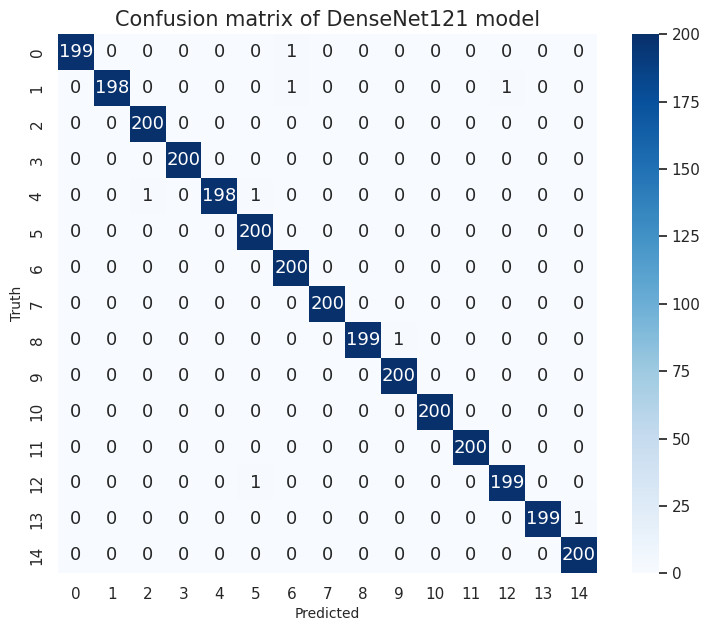

In [79]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_p2), annot = True, square = True, cbar = True, annot_kws = {'size' : 13}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of DenseNet121 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [83]:
base_model2 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [108]:
resnet_model = Sequential()

In [109]:
resnet_model.add(base_model2)
resnet_model.add(Flatten())
resnet_model.add(Dense(15, activation = 'softmax'))

In [110]:
resnet_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [111]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [112]:
reduce_lr2 = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 1, min_delta = 0.001)

In [113]:
history3 = resnet_model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val), callbacks = [reduce_lr2])

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 112ms/step - accuracy: 0.9314 - loss: 0.2530 - val_accuracy: 0.8977 - val_loss: 0.5441 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.6650 - val_loss: 2.9454 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 0.9920 - val_loss: 0.0319 - learning_rate: 1.0000e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9943 - val_loss: 0.0265 - learning_rate: 1.0000e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9985 - loss: 0.0033 - val_accuracy: 0.9953 - val_loss: 0.0251 - learning_rate: 1.0000e-04


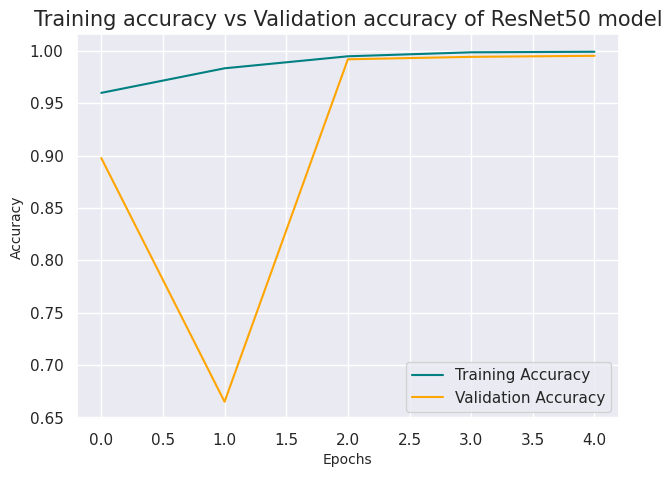

In [114]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

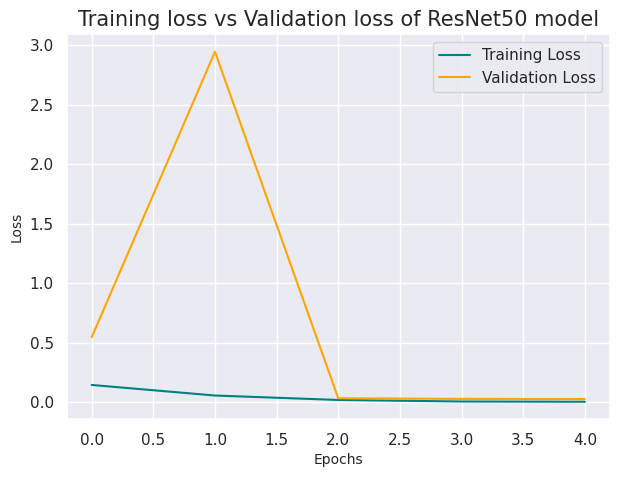

In [115]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [116]:
resnet_model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9919 - loss: 0.0293


[0.021108994260430336, 0.9943333268165588]

In [118]:
y_pred3 = resnet_model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [120]:
y_p3 = [np.argmax(i) for i in y_pred3]

In [121]:
print(classification_report(y_test, y_p3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       1.00      0.98      0.99       200
           2       1.00      1.00      1.00       200
           3       0.99      0.99      0.99       200
           4       0.98      0.98      0.98       200
           5       0.99      0.99      0.99       200
           6       0.99      0.99      0.99       200
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       200
           9       1.00      1.00      1.00       200
          10       0.99      0.99      0.99       200
          11       1.00      1.00      1.00       200
          12       0.99      0.99      0.99       200
          13       1.00      0.99      1.00       200
          14       1.00      1.00      1.00       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

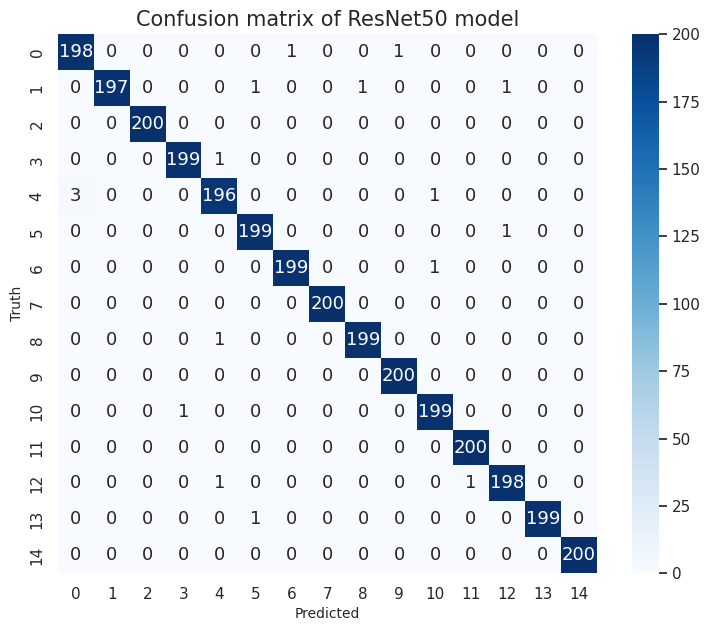

In [122]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_p3), annot = True, square = True, cbar = True, annot_kws = {'size' : 13}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of ResNet50 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()